In [1]:
import osmnx as ox, csv

with open('overpass-api.csv', mode='r') as infile:
    reader = csv.reader(infile)
    overpass_api = {rows[0]:rows[1] for rows in reader}

ox.config(
    log_console=True, 
    use_cache=True, 
    log_file=True,
    overpass_endpoint=overpass_api['main']
)

In [5]:
G = ox.load_graphml('data/g_unprojected.graphml')

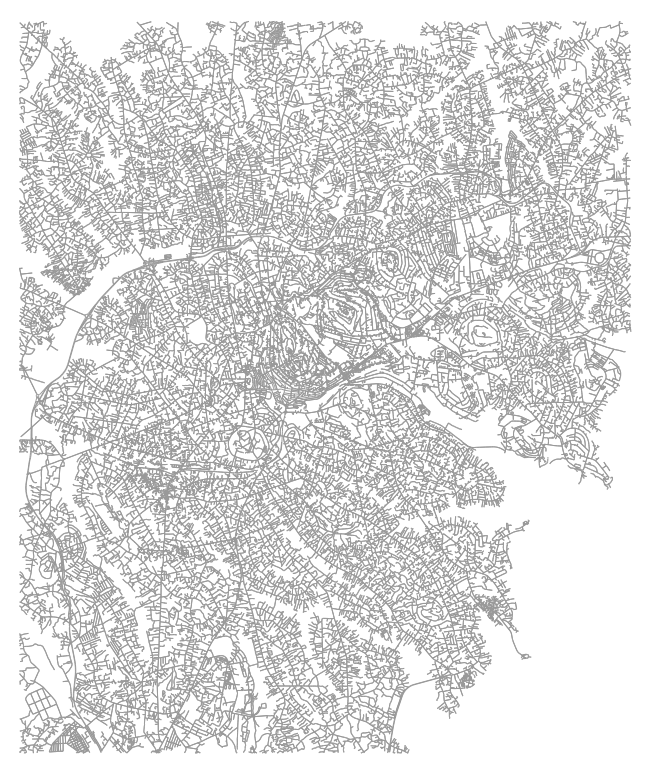

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = ox.plot_graph(ox.project_graph(G), figsize=(14,14), \
                        bgcolor='white', \
                        node_color='teal', node_size=0)

1. https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.bearing.add_edge_bearings
2. https://geoffboeing.com/2018/02/street-network-orientation/#more-3077
3. https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/15-calculate-visualize-edge-bearings.ipynb

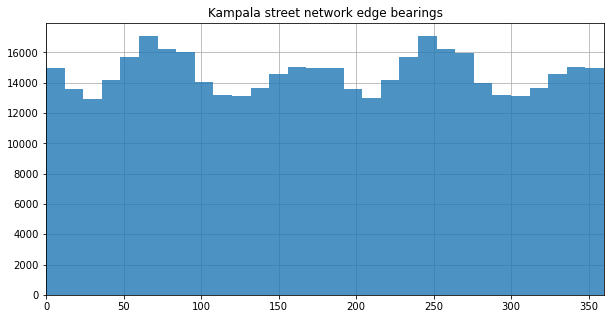

In [18]:
import pandas as pd

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])

ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Kampala street network edge bearings')
plt.rcParams["figure.figsize"] = (4,5)
plt.show()

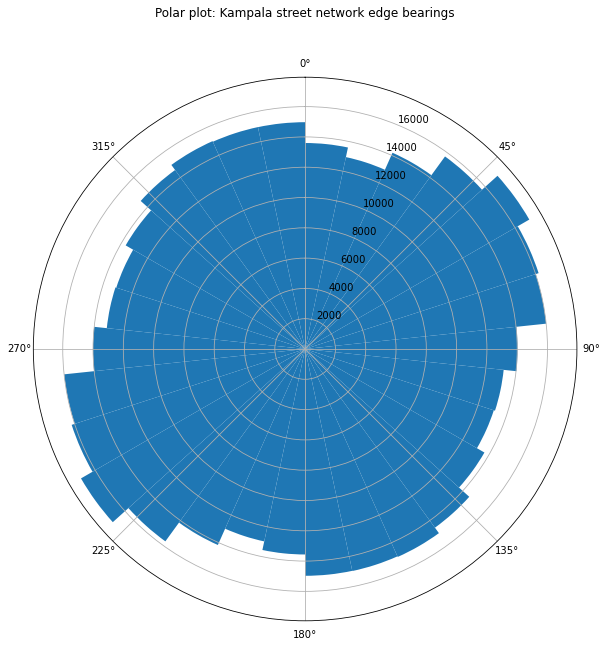

In [22]:
# polar plot
import numpy as np

n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Polar plot: Kampala street network edge bearings', y=1.1)
plt.rcParams["figure.figsize"] = (14,14)

plt.show()